# Problem Statement1(gas_turbines.csv)

In [2]:
#pip install tensorflow

In [4]:
#pip install keras

In [18]:
# Create your first MLP in Keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [19]:
df = pd.read_csv("gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [25]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
X = df.drop(columns = ['TEY'])
Y = df['TEY']

In [26]:
# Standardization of Features
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X = a.transform(X)

In [27]:
len(df)

15039

In [28]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=10,  activation='relu')) #1st layer
model.add(Dense(6,  activation='relu')) #2nd layer
model.add(Dense(4,  activation='relu')) #3nd layer
model.add(Dense(1, activation='linear')) #4th layer or output layer

In [29]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 209 (836.00 Byte)
Trainable params: 209 (836.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Fit the model
history = model.fit(X, Y, validation_split=0.2,validation_data=(X,Y),epochs=250, batch_size=33,verbose=2,use_multiprocessing=True)

Epoch 1/250
456/456 - 9s - loss: 10927.0020 - mean_squared_error: 10927.0020 - val_loss: 924.2532 - val_mean_squared_error: 924.2532 - 9s/epoch - 20ms/step
Epoch 2/250
456/456 - 2s - loss: 471.7896 - mean_squared_error: 471.7896 - val_loss: 305.1433 - val_mean_squared_error: 305.1433 - 2s/epoch - 5ms/step
Epoch 3/250
456/456 - 3s - loss: 242.4124 - mean_squared_error: 242.4124 - val_loss: 189.6651 - val_mean_squared_error: 189.6651 - 3s/epoch - 7ms/step
Epoch 4/250
456/456 - 3s - loss: 153.4078 - mean_squared_error: 153.4078 - val_loss: 121.6469 - val_mean_squared_error: 121.6469 - 3s/epoch - 6ms/step
Epoch 5/250
456/456 - 4s - loss: 100.0834 - mean_squared_error: 100.0834 - val_loss: 82.2727 - val_mean_squared_error: 82.2727 - 4s/epoch - 8ms/step
Epoch 6/250
456/456 - 3s - loss: 69.4419 - mean_squared_error: 69.4419 - val_loss: 58.0305 - val_mean_squared_error: 58.0305 - 3s/epoch - 7ms/step
Epoch 7/250
456/456 - 3s - loss: 49.9858 - mean_squared_error: 49.9858 - val_loss: 41.9080 - va

In [32]:
# evaluate the model
scores = model.evaluate(X, Y)
print(model.metrics_names)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print(scores)

470/470 [==============================] - 1s 3ms/step - loss: 0.5254 - mean_squared_error: 0.5254
['loss', 'mean_squared_error']
mean_squared_error: 52.54%
[0.5253511071205139, 0.5253511071205139]


In [33]:
# list all data in history
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

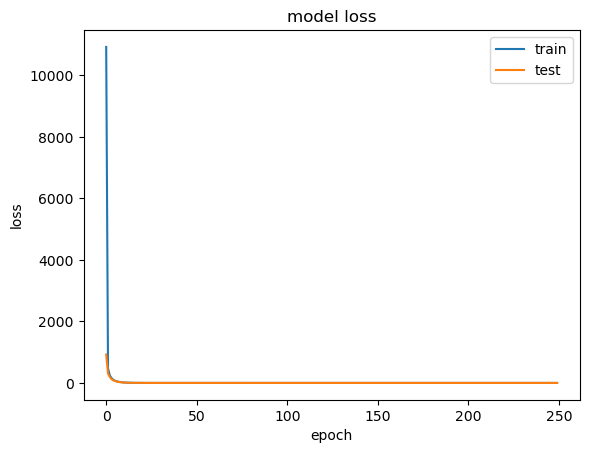

In [34]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Problem Statement2(forestfires.csv)

In [35]:
dg = pd.read_csv('forestfires.csv')
dg

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [36]:
# create model
model1 = Sequential()
model1.add(Dense(30, input_dim=30,  activation='relu')) #1st layer
model1.add(Dense(15,  activation='relu')) #2nd layer
model1.add(Dense(10,  activation='relu')) #3nd layer
model1.add(Dense(5,  activation='relu'))#4th layer
model1.add(Dense(1, activation='sigmoid')) #5th layer or output layer

In [37]:
# Convert the labels to numeric values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dg['size_category'] = label_encoder.fit_transform(dg['size_category'])
dg['day'] = label_encoder.fit_transform(dg['day'])
dg['month'] = label_encoder.fit_transform(dg['month'])

In [38]:
X1 = dg.drop(columns = ['size_category'])
Y1 = dg['size_category']
X1.shape

(517, 30)

In [39]:
# Standardization
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X1)
X1 = a.transform(X1)

In [40]:
# Compile model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 209 (836.00 Byte)
Trainable params: 209 (836.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# Fit the model
history = model1.fit(X1, Y1, validation_split=0.25,validation_data=(X1,Y1), epochs=300, batch_size=33,verbose=2,use_multiprocessing=True)

Epoch 1/300
16/16 - 3s - loss: 0.7313 - accuracy: 0.4178 - val_loss: 0.6783 - val_accuracy: 0.5280 - 3s/epoch - 171ms/step
Epoch 2/300
16/16 - 0s - loss: 0.6548 - accuracy: 0.5880 - val_loss: 0.6239 - val_accuracy: 0.6905 - 156ms/epoch - 10ms/step
Epoch 3/300
16/16 - 0s - loss: 0.6088 - accuracy: 0.7157 - val_loss: 0.5929 - val_accuracy: 0.7311 - 142ms/epoch - 9ms/step
Epoch 4/300
16/16 - 0s - loss: 0.5882 - accuracy: 0.7292 - val_loss: 0.5768 - val_accuracy: 0.7311 - 140ms/epoch - 9ms/step
Epoch 5/300
16/16 - 0s - loss: 0.5741 - accuracy: 0.7311 - val_loss: 0.5651 - val_accuracy: 0.7311 - 152ms/epoch - 10ms/step
Epoch 6/300
16/16 - 0s - loss: 0.5621 - accuracy: 0.7331 - val_loss: 0.5553 - val_accuracy: 0.7331 - 150ms/epoch - 9ms/step
Epoch 7/300
16/16 - 0s - loss: 0.5530 - accuracy: 0.7331 - val_loss: 0.5461 - val_accuracy: 0.7331 - 152ms/epoch - 9ms/step
Epoch 8/300
16/16 - 0s - loss: 0.5440 - accuracy: 0.7331 - val_loss: 0.5369 - val_accuracy: 0.7331 - 164ms/epoch - 10ms/step
Epoch 

In [43]:
# evaluate the model
scores = model1.evaluate(X1, Y1)
print(model1.metrics_names)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model1.metrics_names[0], scores[0]*100))

17/17 [==============================] - 0s 4ms/step - loss: 3.2356e-04 - accuracy: 1.0000
['loss', 'accuracy']
accuracy: 100.00%
loss: 0.03%


In [44]:
# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

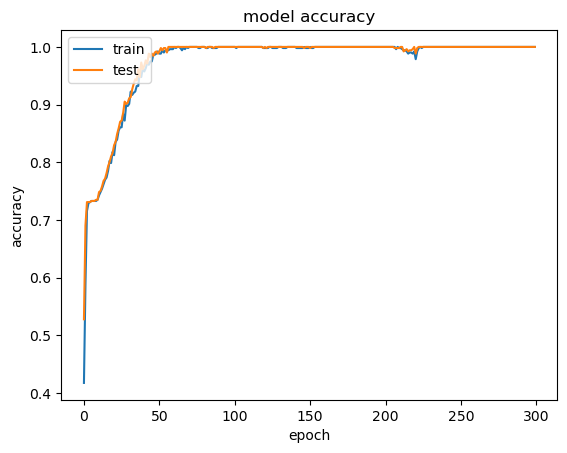

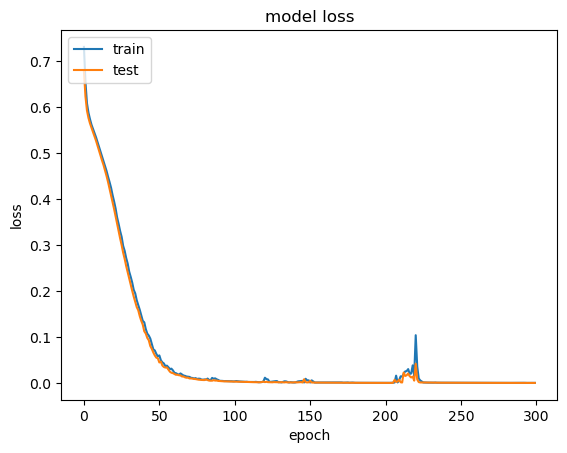

In [45]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()